In [1]:
import numpy as np
from scipy.sparse import csr_matrix, load_npz, vstack, save_npz

In [2]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

In [3]:
from sklearn.feature_selection import VarianceThreshold

### Reading numpy files

In [4]:
feature_inga = load_npz('features_inga.npz').tocsr()
feature_inga.toarray().shape

(842, 7493)

In [5]:
label_inga = np.load('classes_inga.npy')
label_inga.shape

(842, 71)

In [6]:
n_inga = label_inga.shape[0]
n_inga

842

In [7]:
feature_silico = load_npz('features_silico.npz').tocsr()
feature_silico.toarray().shape

(75785, 7493)

In [8]:
label_silico = np.load('classes_silico.npy')
label_silico.shape

(75785, 71)

In [9]:
n_silico = label_silico.shape[0]
n_silico

75785

### Temp

In [18]:
(label_inga.sum(axis=0)>50).sum()

16

### Merging

In [117]:
feature = vstack([feature_inga, feature_silico])
feature.toarray().shape

(76627, 7493)

In [118]:
label = np.concatenate([label_inga, label_silico], axis=0)
label.shape

(76627, 71)

### Distribution of features

In [119]:
n_unique = np.apply_along_axis(lambda x: np.unique(x).size, 0, feature.toarray())
n_unique

array([18183,     1,     1, ...,     2,     2,     1])

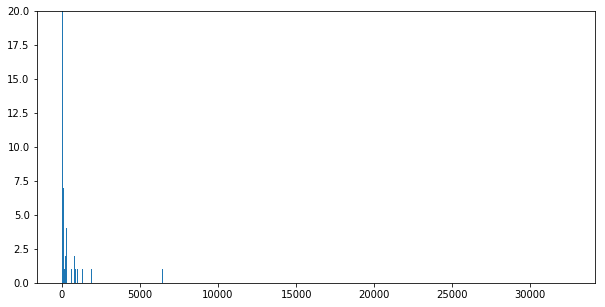

In [78]:
plt.hist(n_unique, bins=n_unique.max()-n_unique.min()+1)
plt.ylim([0,20])
plt.show()

### Dropping invariant columns

In [120]:
vt = VarianceThreshold()

In [121]:
selected_inga = vt.fit(feature_inga, label_inga).get_support()
selected_inga

array([ True, False, False, ...,  True,  True, False], dtype=bool)

In [122]:
selected_silico = vt.fit(feature_silico, label_silico).get_support()
selected_silico

array([ True, False, False, ..., False, False, False], dtype=bool)

In [123]:
new_feature = feature[:,selected_inga & selected_silico]
new_feature.toarray().shape

(76627, 1676)

In [124]:
new_feature2 = vt.transform(feature)
new_feature2.shape

(76627, 5128)

### Separating

In [130]:
new_feature_inga = new_feature[:n_inga]
new_feature_inga.shape

(842, 1676)

In [132]:
new_feature_silico = new_feature[n_inga:]
new_feature_silico.shape

(75785, 1676)

### Writing numpy files

In [135]:
save_npz('features_inga_dropped', new_feature_inga)

In [136]:
save_npz('features_silico_dropped', new_feature_silico)

In [137]:
np.save('features_inga_dropped', new_feature_inga.todense())

In [138]:
np.save('features_silico_dropped', new_feature_silico.todense())